In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
arm_range=[i-5 for i in range(11)]

initial_basis=[np.pi/4,3*np.pi/4, 5*np.pi/4, 7*np.pi/4]

def reward_func(arm_angle, current_angle):
    #rotation = min(abs(current_angle - np.pi/4), abs(current_angle - 3*np.pi/4), abs(current_angle - 5*np.pi/4), abs(current_angle - 7*np.pi/4))
    min_index = 0
    for i in range(len(initial_basis)):
        if (abs(current_angle - initial_basis[i]))<(abs(current_angle - initial_basis[min_index])):
            min_index = i
    #print(min_index)
    action_angle = (current_angle - arm_angle)
    reward = -1000*(action_angle - initial_basis[min_index])**2
    return (reward)



In [4]:
#testing reward function

print(arm_range[6])
print(arm_range)
print(reward_func(arm_angle=np.pi/180,current_angle=np.pi/4+np.pi/180))

1
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
-0.0


In [5]:
class UCB:
  def __init__(self, reward_func, arm_range, current_angle, c=1.414):  #n is number of arms
    
    self.arms = arm_range                           # list of arms
    self.n_arm = len(arm_range)                  
    self.arm_avg = np.zeros(len(arm_range))                  #sample mean reward for nth arm
    self.arm_pick = np.ones(len(arm_range))                  # number of times each arm has been picked
    self.c = c
    self.rounds = 0                                 # total number of rounds played till now
    self.reward_func = reward_func                  # list of reward functions
    self.rews = []

  def initialise(self,current_angle):                             #playing each arm once
    self.arm_avg = np.array([reward_func(i*np.pi/180,current_angle) for i in self.arms])

  def best_arm(self):
    return np.argmax(self.arm_avg + self.c * (np.array([np.log(self.rounds)])/self.arm_pick)**0.5)

  def update(self,rounds,current_angle):
    self.rounds += rounds
    for i in range(rounds):
      arm = self.best_arm()
      #print(arm)
      reward = self.reward_func(self.arms[arm]*np.pi/180,current_angle)
      #print(reward)
      # if(arm==6):
      #   print(reward)
      num = ( self.arm_avg[arm] * self.arm_pick[arm] + reward )
      denom = (self.arm_pick[arm] + 1.0)
      self.arm_avg[arm] = num / denom
      self.arm_pick[arm] += 1
      self.rews.append(reward)

  def plotter(self):
    rews = np.cumsum(self.rews).astype(float)
    for i in range(len(rews)):
      rews[i] = rews[i]/(i+1.0)
    plt.plot(range(1,len(rews)+1),rews)

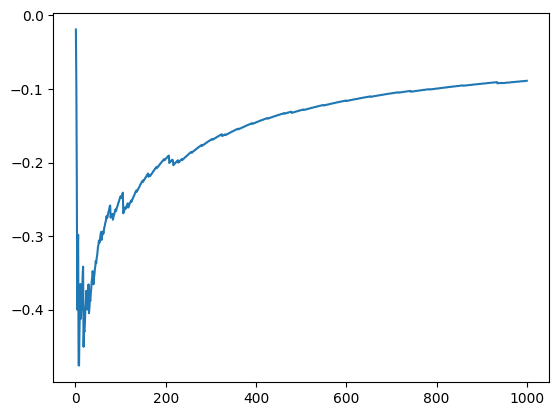

In [6]:
obj = UCB(reward_func,arm_range,np.pi/4+1.75*np.pi/180)
obj.initialise(np.pi/4+1.75*np.pi/180)
obj.update(1000,np.pi/4+1.75*np.pi/180)
obj.plotter()



In [25]:
class Constellation:
    def __init__(self,number_timesteps,omega,angle_noise_std_dev) -> None:
        self.number_timesteps = number_timesteps
        self.omega=omega
        self.angle_noise_std_dev=angle_noise_std_dev
        self.basis=[np.pi/4,3*np.pi/4,5*np.pi/4,7*np.pi/4]
        self.type=type
        #self.radius=np.sqrt(2)

    def generate_constellations(self):
        constellation_array=np.zeros(self.number_timesteps)
        cumulative_noise=0
        for i in range(self.number_timesteps):
            basis_num=np.random.randint(0,4)
            noise=np.random.normal(0,self.angle_noise_std_dev)
            cumulative_noise+=noise
            constellation_array[i]=(self.basis[basis_num]+cumulative_noise)%(2*np.pi)

        return constellation_array

def deg_to_rad(degree_angle):
    return np.pi/180*degree_angle

const=Constellation(200,deg_to_rad(0.7),angle_noise_std_dev=deg_to_rad(3))
constellation_array=const.generate_constellations()
print(constellation_array)


[5.47327214 5.44602717 2.2650728  3.75970909 5.35092422 2.25014503
 2.2324927  2.25150904 5.42010741 3.82010611 2.21054842 0.56735715
 2.01995911 1.98262911 1.94039033 0.4055574  5.10468242 2.023346
 3.54431997 0.37287239 1.97188931 0.33744236 5.10747342 5.23095631
 2.07302348 5.28487907 5.23236563 2.12180358 0.48911489 5.12376283
 3.560369   3.60045721 3.66218932 0.53985854 0.56321829 5.23740289
 2.04352388 5.1905984  5.25742263 3.77335552 2.19287783 3.82721224
 0.69254767 3.85273889 3.86219293 2.38430558 2.35638052 5.47350579
 2.33056572 2.24667468 0.64566691 5.51594867 0.79755099 3.9236714
 3.88784126 2.35964809 3.98058667 5.57720648 5.53545037 5.42661287
 2.37363789 2.35182836 3.93589219 3.94726789 0.70527018 2.30321559
 5.48916326 3.8851426  2.29865332 2.33884761 3.88923559 3.89192481
 2.35625072 5.47954215 5.58078685 5.60037337 2.44107885 5.58432832
 5.574917   0.81632646 0.77499644 3.92129412 3.9870344  0.87494502
 5.57568218 5.52318858 2.27812975 2.23082781 0.68853564 0.7151272

Contellation movement before UCB applied


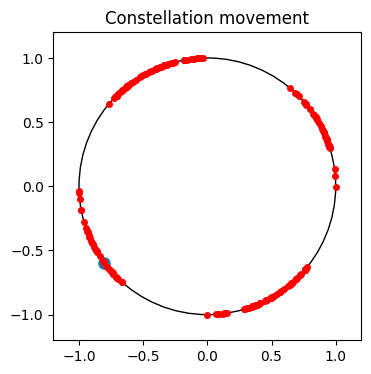

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# Option A: interactive canvas
#%matplotlib notebook

# Option B: render inline (non-interactive)
%matplotlib inline

# Your array of angles (replace with your own)
def plot_angle_animation(angles):
# Precompute (optional but tidy)
    xs = np.cos(angles)
    ys = np.sin(angles)

    # Figure setup
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title("Constellation movement")

    # Unit circle
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_patch(circle)

    # Artists: a point + a trail
    point, = ax.plot([], [], marker='o', markersize=8, linestyle='None')
    trail, = ax.plot([], [], marker='o', markersize=4, linestyle='None', color='r')


    def update(i):
        # IMPORTANT: give sequences to set_data to avoid "object has no len()" errors
        point.set_data([xs[i]], [ys[i]])
        trail.set_data(xs[:i+1], ys[:i+1])
        return point, trail

    # If you see a backend/blitting error, change blit=True -> blit=False
    ani = FuncAnimation(fig, update,
                        frames=len(angles), interval=50, blit=True)

    return ani
#plt.show()

print("Contellation movement before UCB applied")
angles = constellation_array
ani=plot_angle_animation(angles)
HTML(ani.to_jshtml())   # or ani.to_html5_video()



Using 100 UCB iterations for each timestep.
We start a new UCB for each timestep whatever best arm we get from this UCB after 100 iterations we add that angle to the cumulative phase shift.
This cumulative phase shift is applied to the next timestep before applying the UCB. 

In [27]:
#Generate the constellation array
#const=Constellation(100,omega=deg_to_rad(0.7),angle_noise_std_dev=deg_to_rad(0.5))
#constellation_array=const.generate_constellations()


cumulative_phase_shift=0
updated_constellation_array=[]
for time_step in range(100):
    current_angle=constellation_array[time_step]-cumulative_phase_shift
    updated_constellation_array.append(current_angle)
    obj=UCB(reward_func,arm_range=arm_range,current_angle=current_angle)
    obj.initialise(current_angle)
    obj.update(100,current_angle)
    optimal_phase_shift_this_timestep=deg_to_rad(arm_range[obj.best_arm()])
    cumulative_phase_shift+=optimal_phase_shift_this_timestep
    print(optimal_phase_shift_this_timestep)

-0.03490658503988659
-0.017453292519943295
-0.03490658503988659
-0.08726646259971647
0.03490658503988659
0.03490658503988659
-0.017453292519943295
0.017453292519943295
0.03490658503988659
-0.017453292519943295
-0.05235987755982989
-0.08726646259971647
-0.08726646259971647
-0.05235987755982989
-0.05235987755982989
0.05235987755982989
-0.017453292519943295
0.03490658503988659
-0.03490658503988659
-0.03490658503988659
0.03490658503988659
-0.06981317007977318
0.05235987755982989
0.08726646259971647
0.0
0.08726646259971647
-0.03490658503988659
0.03490658503988659
-0.05235987755982989
-0.08726646259971647
-0.017453292519943295
0.06981317007977318
0.05235987755982989
0.0
0.03490658503988659
-0.03490658503988659
-0.06981317007977318
-0.017453292519943295
0.08726646259971647
0.08726646259971647
0.0
0.08726646259971647
0.0
0.03490658503988659
-0.017453292519943295
0.08726646259971647
0.0
-0.05235987755982989
0.017453292519943295
-0.08726646259971647
-0.05235987755982989
0.08726646259971647
0.087

Constellation Movement after UCB applied every timestep


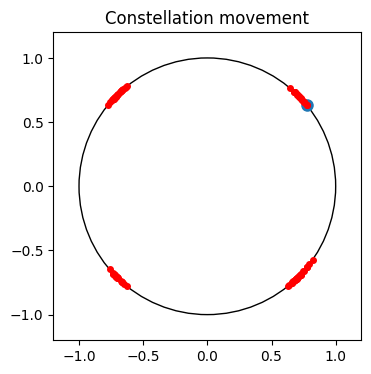

In [28]:
#Constellation movement after UCB
print("Constellation Movement after UCB applied every timestep")

angles = updated_constellation_array
ani=plot_angle_animation(angles)
HTML(ani.to_jshtml())
